In [78]:
import numpy as np
# for dataframe manipulations
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for missing values
import missingno as mno
# for date time manipulation
import datetime
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
# setting up the background style for the plots
plt.style.use('fivethirtyeight')


In [79]:
%time
data=pd.read_csv('/content/drive/MyDrive/stat ml/fifa_eda_stats.csv')
# lets also check the shape of the dataset
print(data.shape)
data.columns

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 19.1 µs
(18207, 57)


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

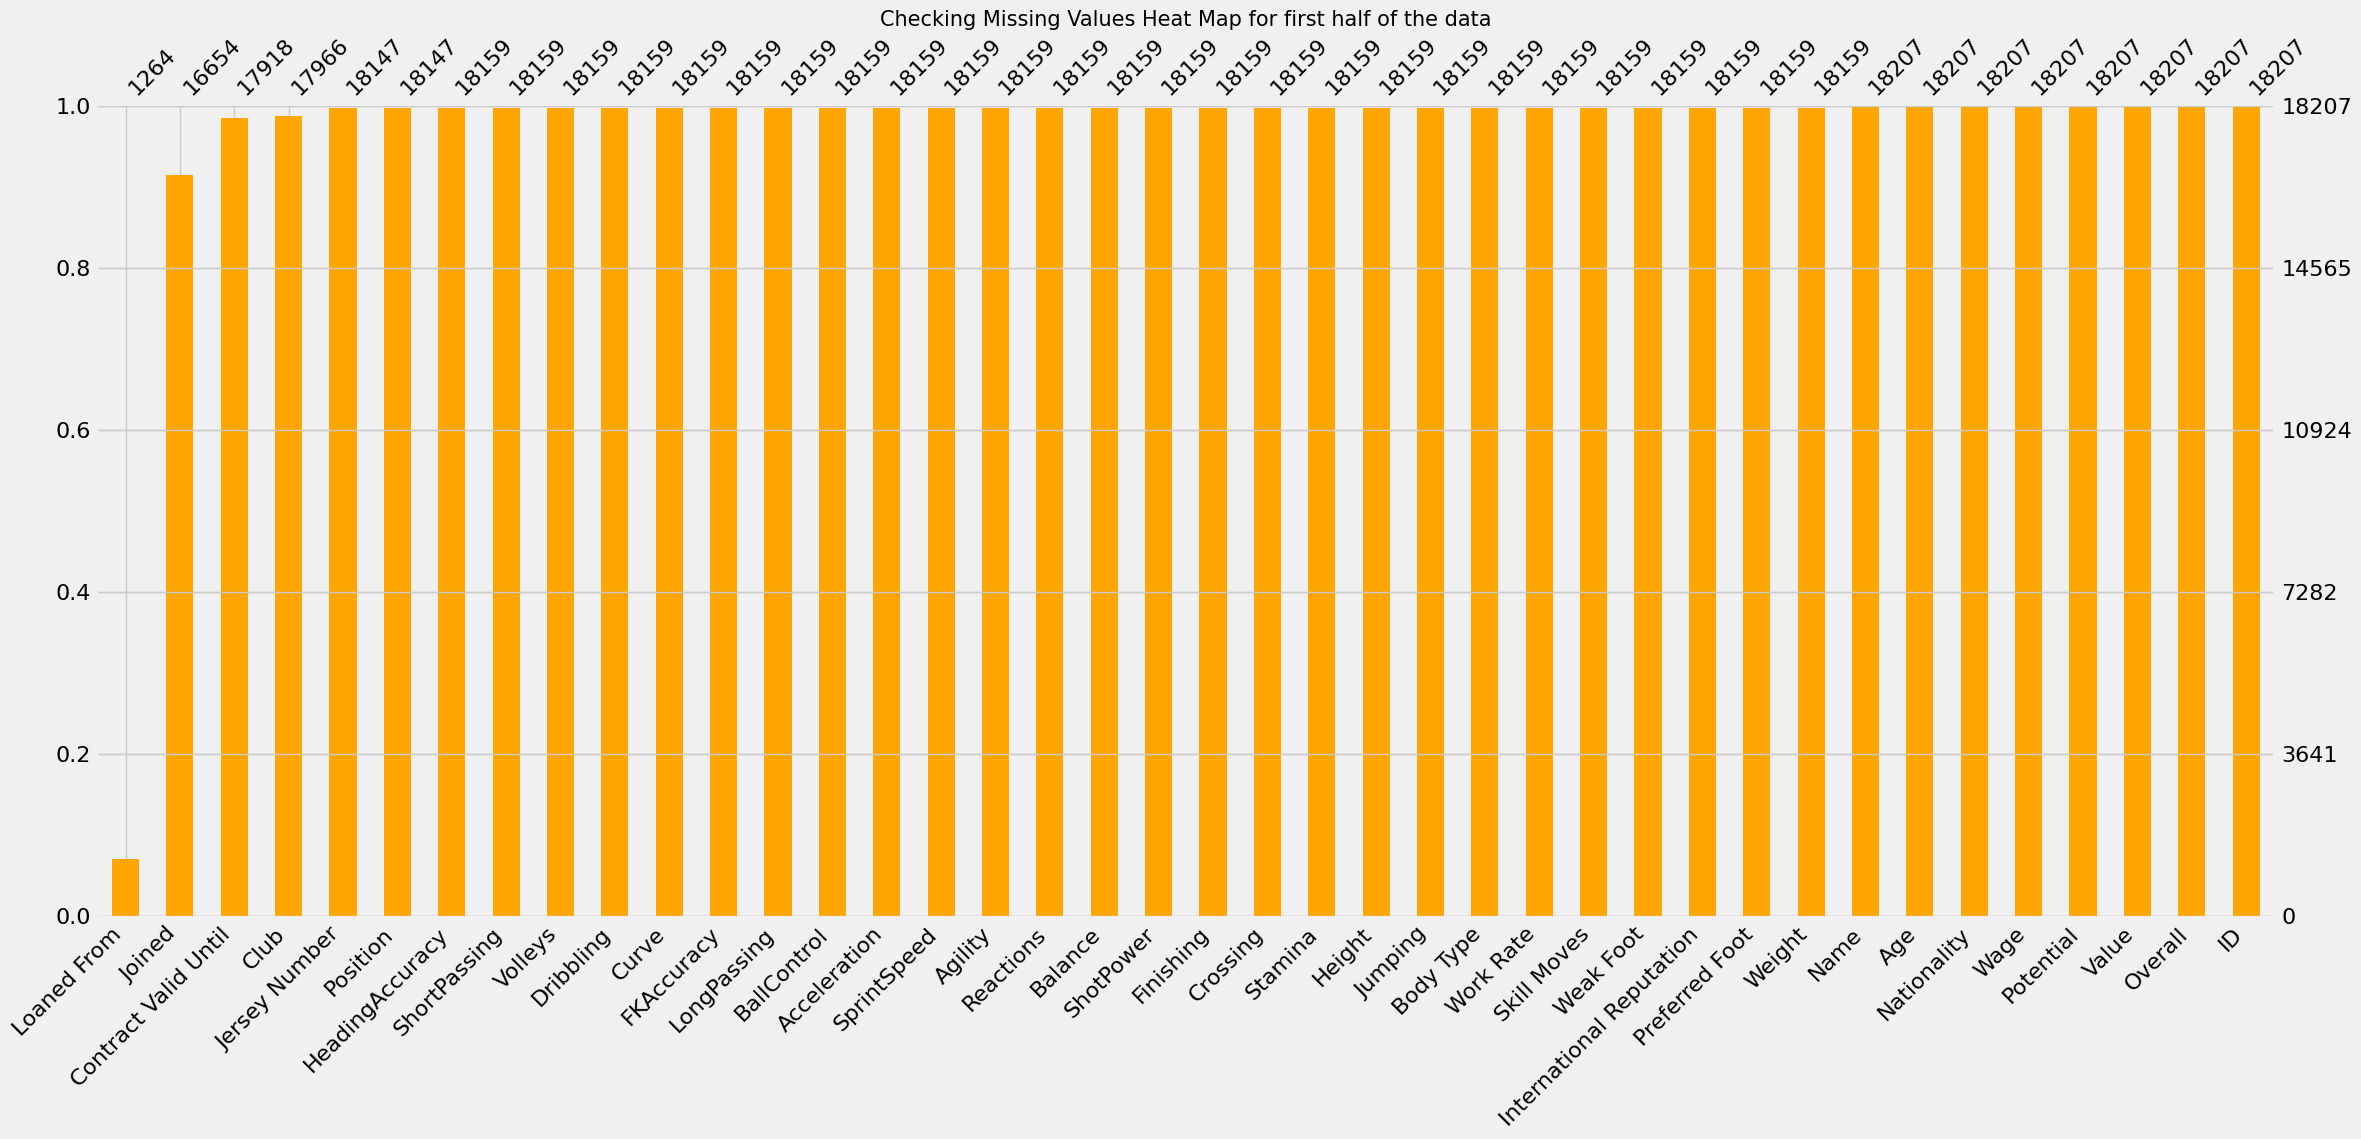

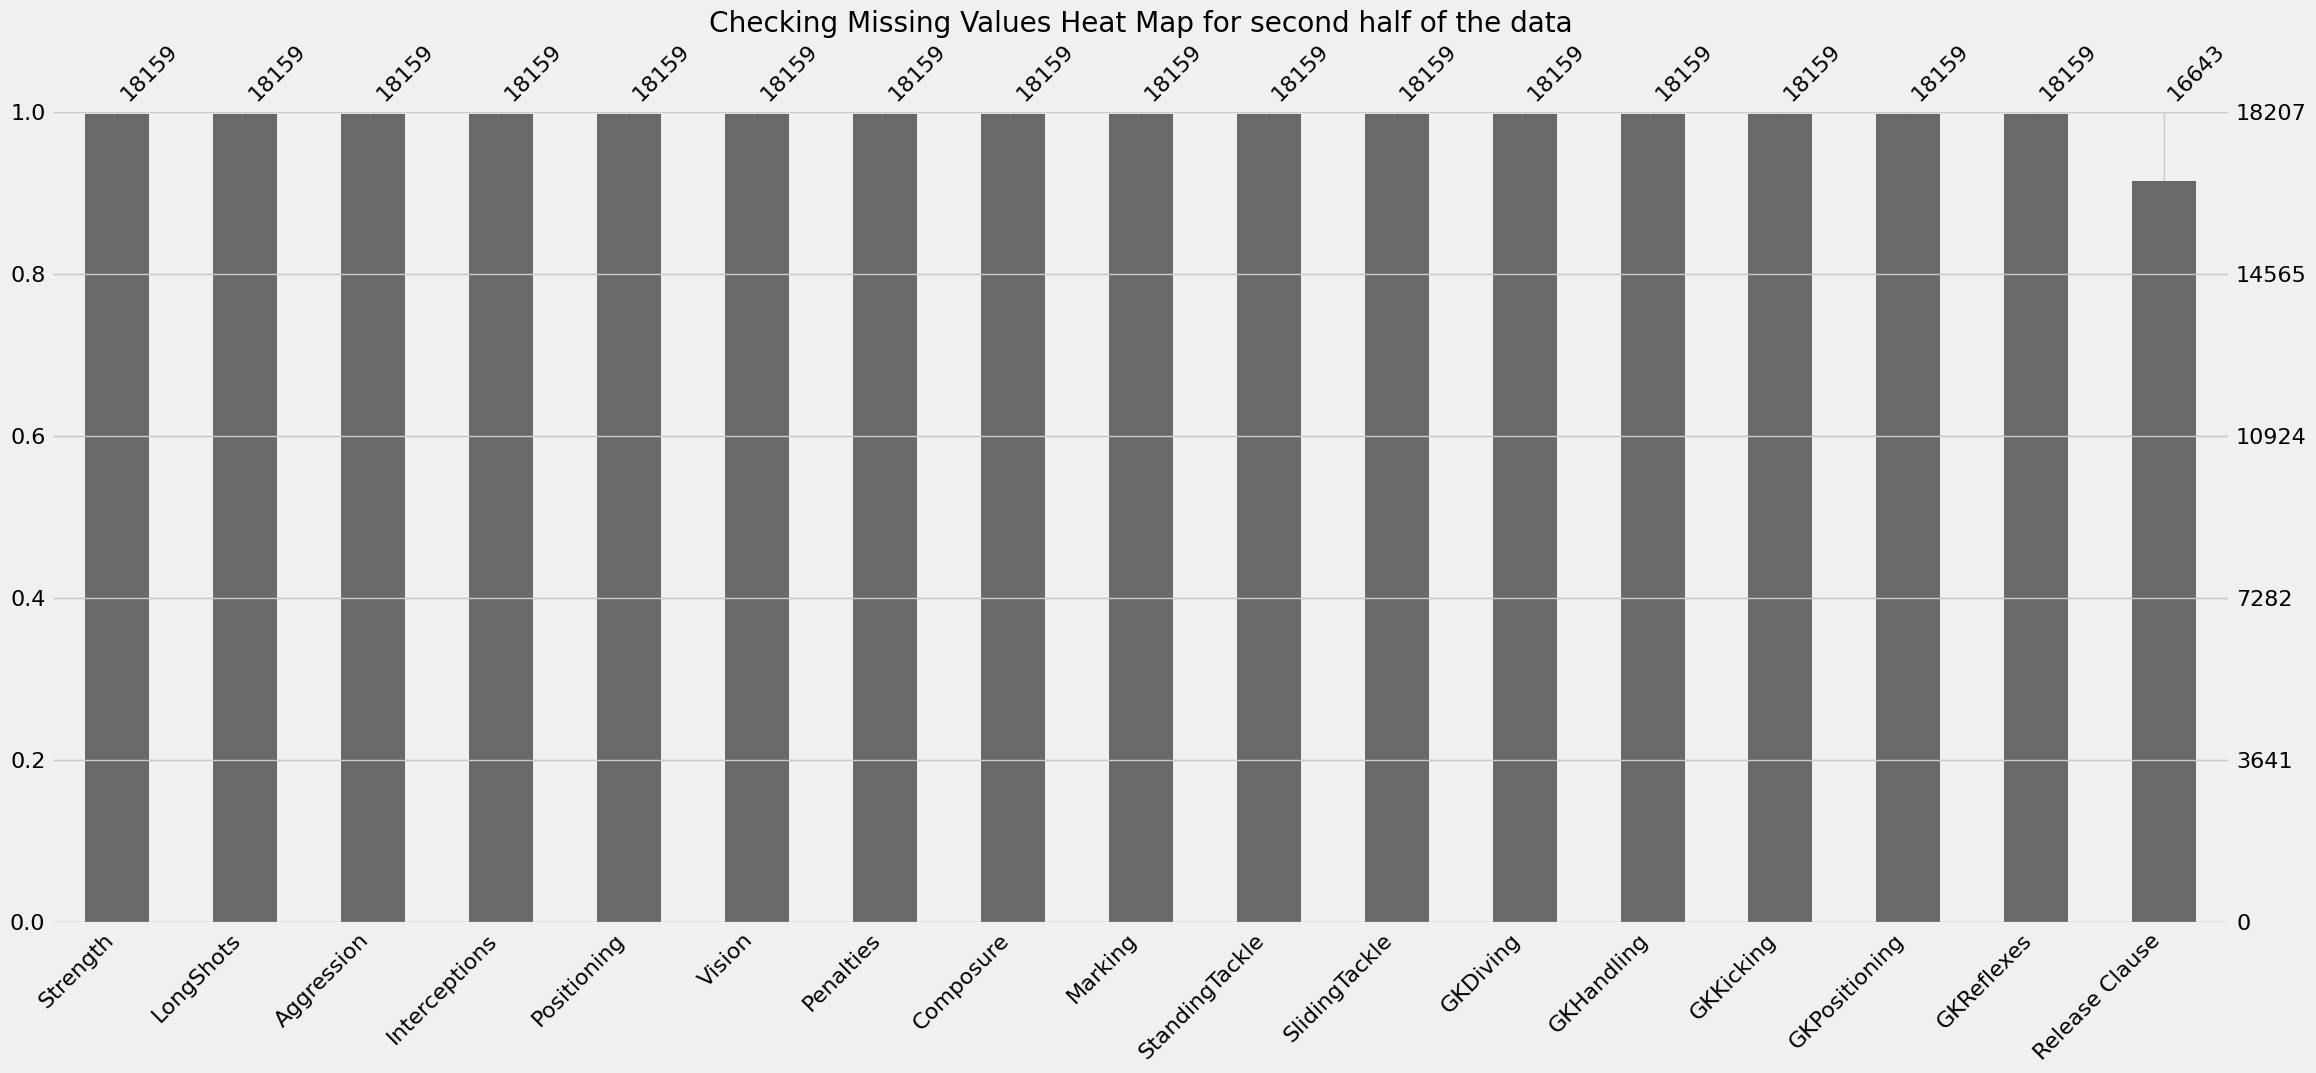

In [80]:
mno.bar(data.iloc[:, :40],
 color = 'orange',
 sort = 'ascending')
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize =
15)
plt.show()
# Visualize missing values as a matrix
mno.bar(data.iloc[:, 40:])
plt.title('Checking Missing Values Heat Map for second half of the data')
plt.show()

In [81]:
# List of columns to fill with the mean
columns_to_fill_with_mean = ['ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'LongPassing', 'BallControl', 'HeadingAccuracy', 'Finishing', 'Crossing']

# Fill specified columns with the mean
data[columns_to_fill_with_mean] = data[columns_to_fill_with_mean].fillna(data[columns_to_fill_with_mean].mean())

# List of columns to fill with specific values
columns_to_fill_with_specific = ['FKAccuracy', 'Weight', 'Contract Valid Until', 'Height', 'Loaned From', 'Joined', 'Jersey Number', 'Body Type', 'Position', 'Club', 'Work Rate', 'Skill Moves', 'Weak Foot', 'Preferred Foot', 'International Reputation', 'Wage']

# Fill specified columns with specific values
data[columns_to_fill_with_specific] = data[columns_to_fill_with_specific].fillna({'FKAccuracy': 0, 'Weight': '200lbs', 'Contract Valid Until': 2019, 'Height': "5'11", 'Loaned From': 'None', 'Joined': 'Jul 1, 2018', 'Jersey Number': 8, 'Body Type': 'Normal', 'Position': 'ST', 'Club': 'No Club', 'Work Rate': 'Medium/ Medium', 'Skill Moves': data['Skill Moves'].median(), 'Weak Foot': 3, 'Preferred Foot': 'Right', 'International Reputation': 1, 'Wage': '€200K'})

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Check if there are any missing values left
missing_values = data.isnull().sum().sum()
print("Total missing values after imputation:", missing_values)


Total missing values after imputation: 0


In [82]:
def defending(data):
 return int(round((data[['Marking', 'StandingTackle',
 'SlidingTackle']].mean()).mean()))
def general(data):
 return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve',
 'BallControl']].mean()).mean()))
def mental(data):
 return int(round((data[['Aggression', 'Interceptions', 'Positioning',
 'Vision','Composure']].mean()).mean()))
def passing(data):
 return int(round((data[['Crossing', 'ShortPassing',
 'LongPassing']].mean()).mean()))
def mobility(data):
 return int(round((data[['Acceleration', 'SprintSpeed',
 'Agility','Reactions']].mean()).mean()))
def power(data):
 return int(round((data[['Balance', 'Jumping', 'Stamina',
 'Strength']].mean()).mean()))
def rating(data):
 return int(round((data[['Potential', 'Overall']].mean()).mean()))
def shooting(data):
 return int(round((data[['Finishing', 'Volleys', 'FKAccuracy',
 'ShotPower','LongShots', 'Penalties']].mean()).mean()))


In [83]:
# Assuming you have defined your custom functions elsewhere in your code.

data['Defending'] = data.apply(defending, axis=1)
data['General'] = data.apply(general, axis=1)
data['Mental'] = data.apply(mental, axis=1)
data['Passing'] = data.apply(passing, axis=1)
data['Mobility'] = data.apply(mobility, axis=1)
data['Power'] = data.apply(power, axis=1)
data['Rating'] = data.apply(rating, axis=1)
data['Shooting'] = data.apply(shooting, axis=1)


<ipython-input-84-3963228dd725>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Defending'], color = 'red')
<ipython-input-84-3963228dd725>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['General'], color = 'black')
<ipython-input-84-3963228dd725>:10: UserWarning: 

`distplot` is a

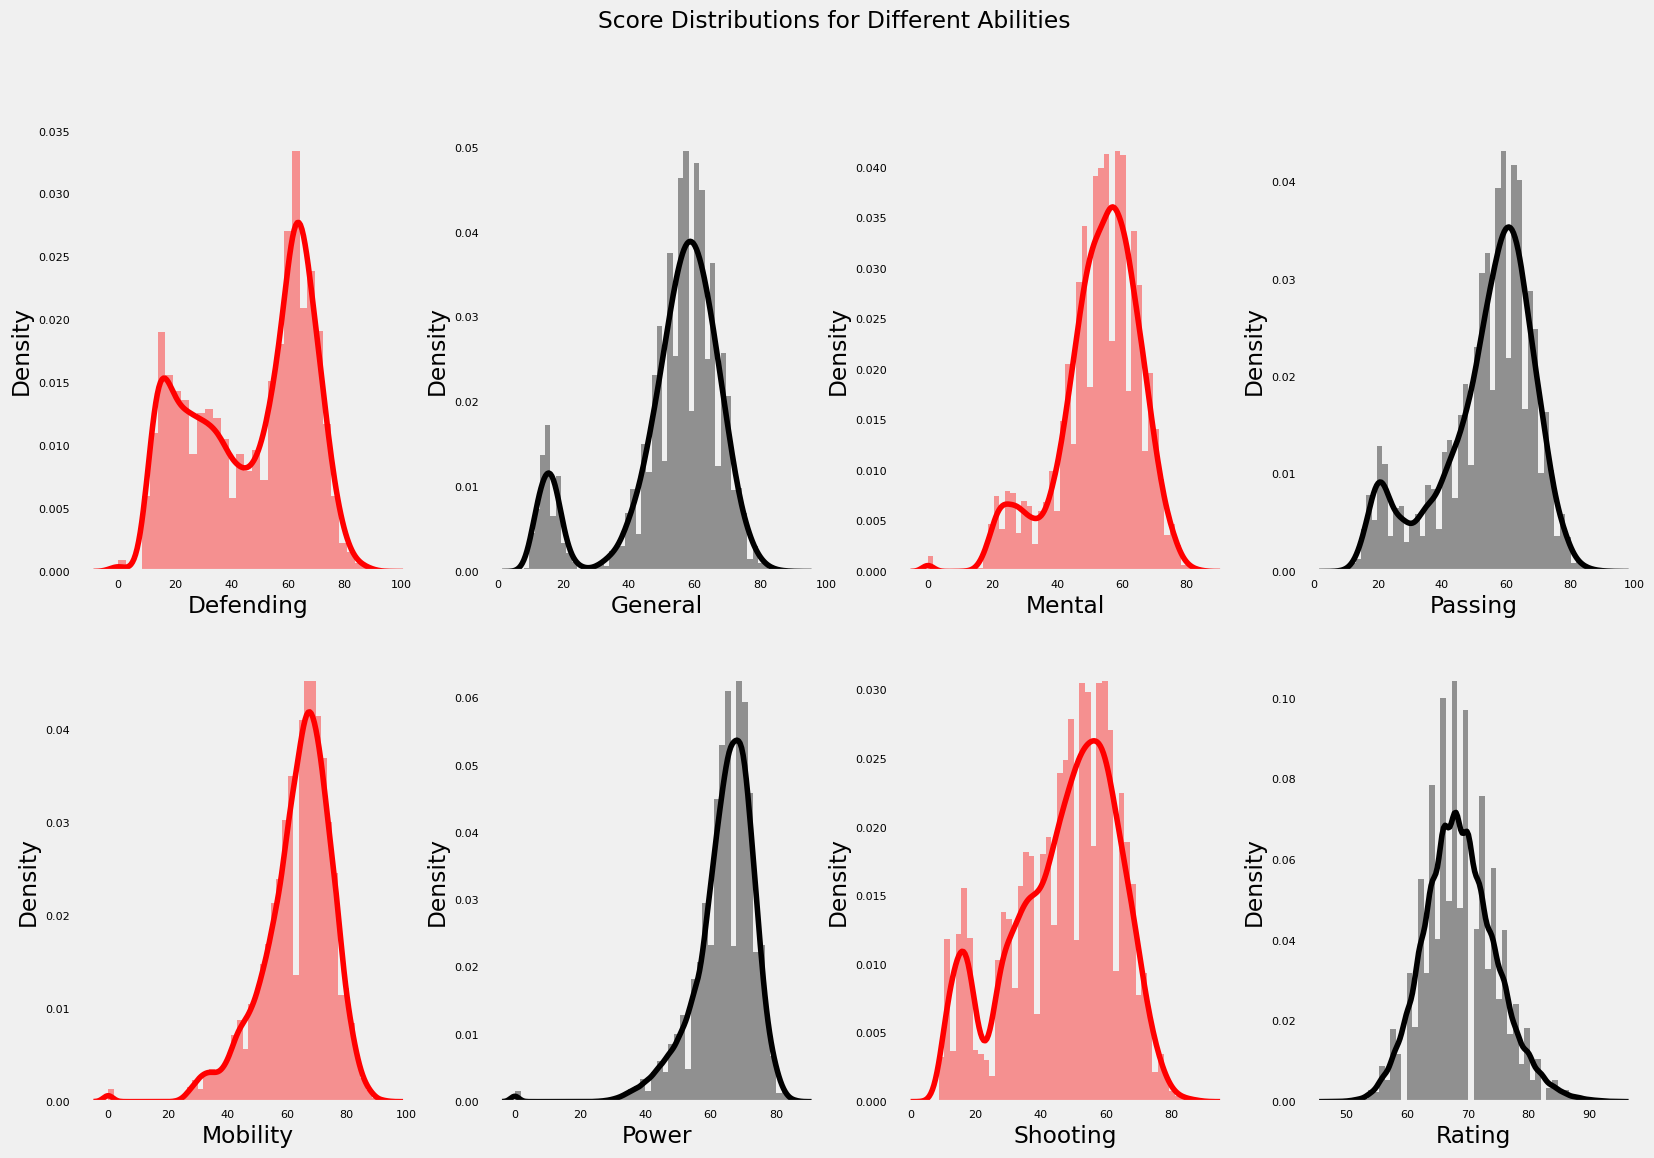

In [84]:
# lets check the Distribution of Scores of Different Skills
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()
plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()
plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()
plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()
plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()
plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()
plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()
plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()
plt.suptitle('Score Distributions for Different Abilities')
plt.show()

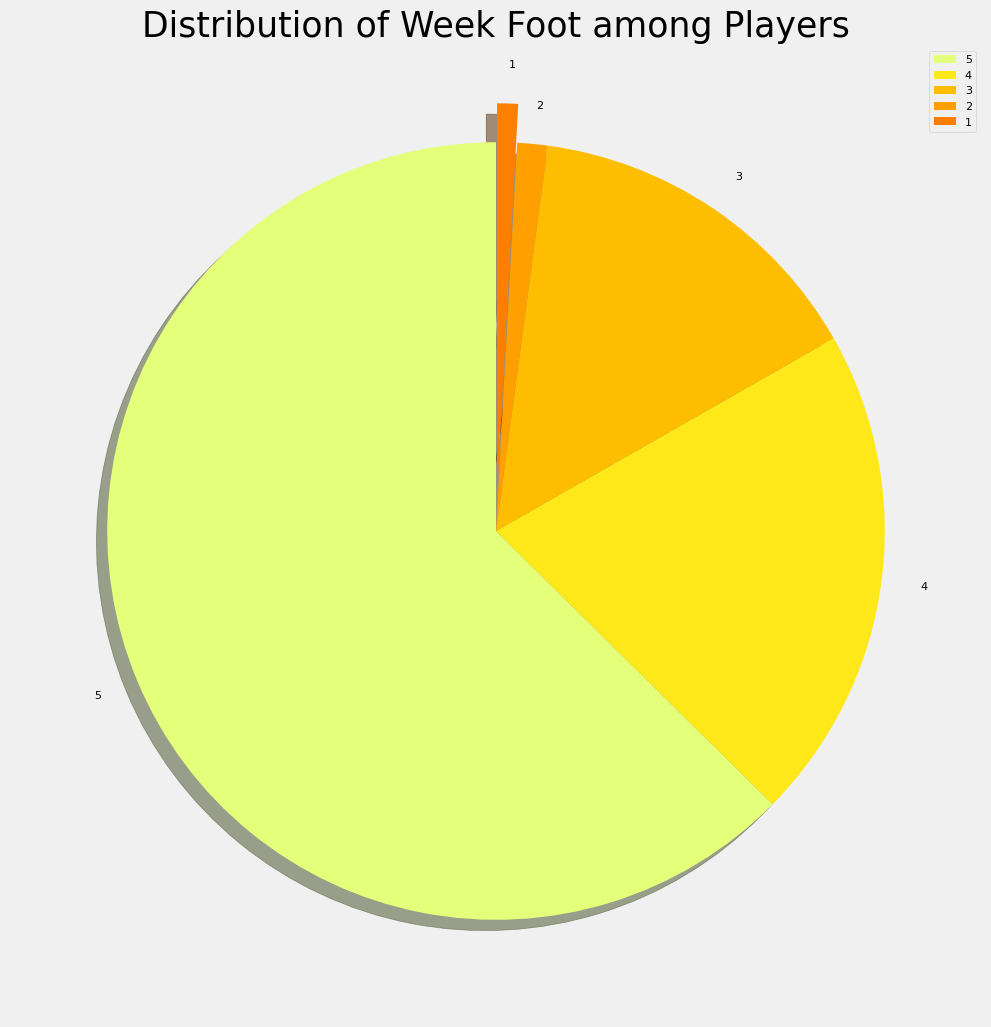

In [85]:
# plotting a pie chart to represent the share of week foot players
labels = ['5', '4', '3', '2', '1']
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True,
startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

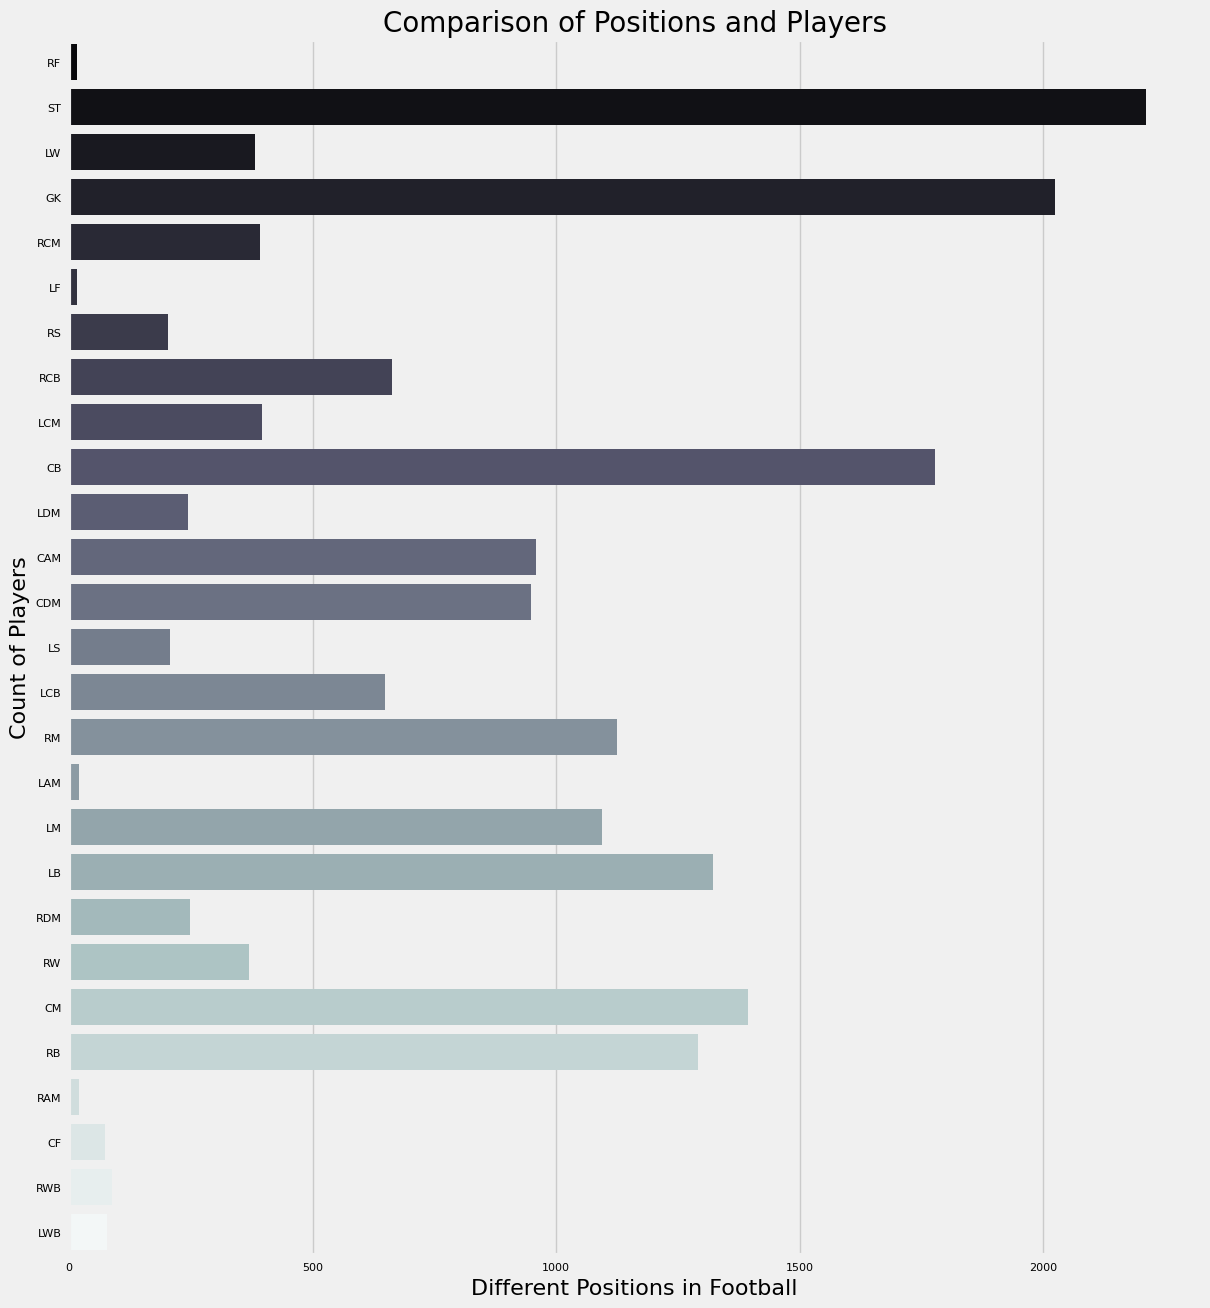

In [86]:
# different positions acquired by the players
plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [87]:
# defining a function for cleaning the Weight data
def extract_value_from(value):
 out = value.replace('lbs', '')
 return float(out)

In [88]:
# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))


<ipython-input-89-2f36916e3532>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'], color = 'black')


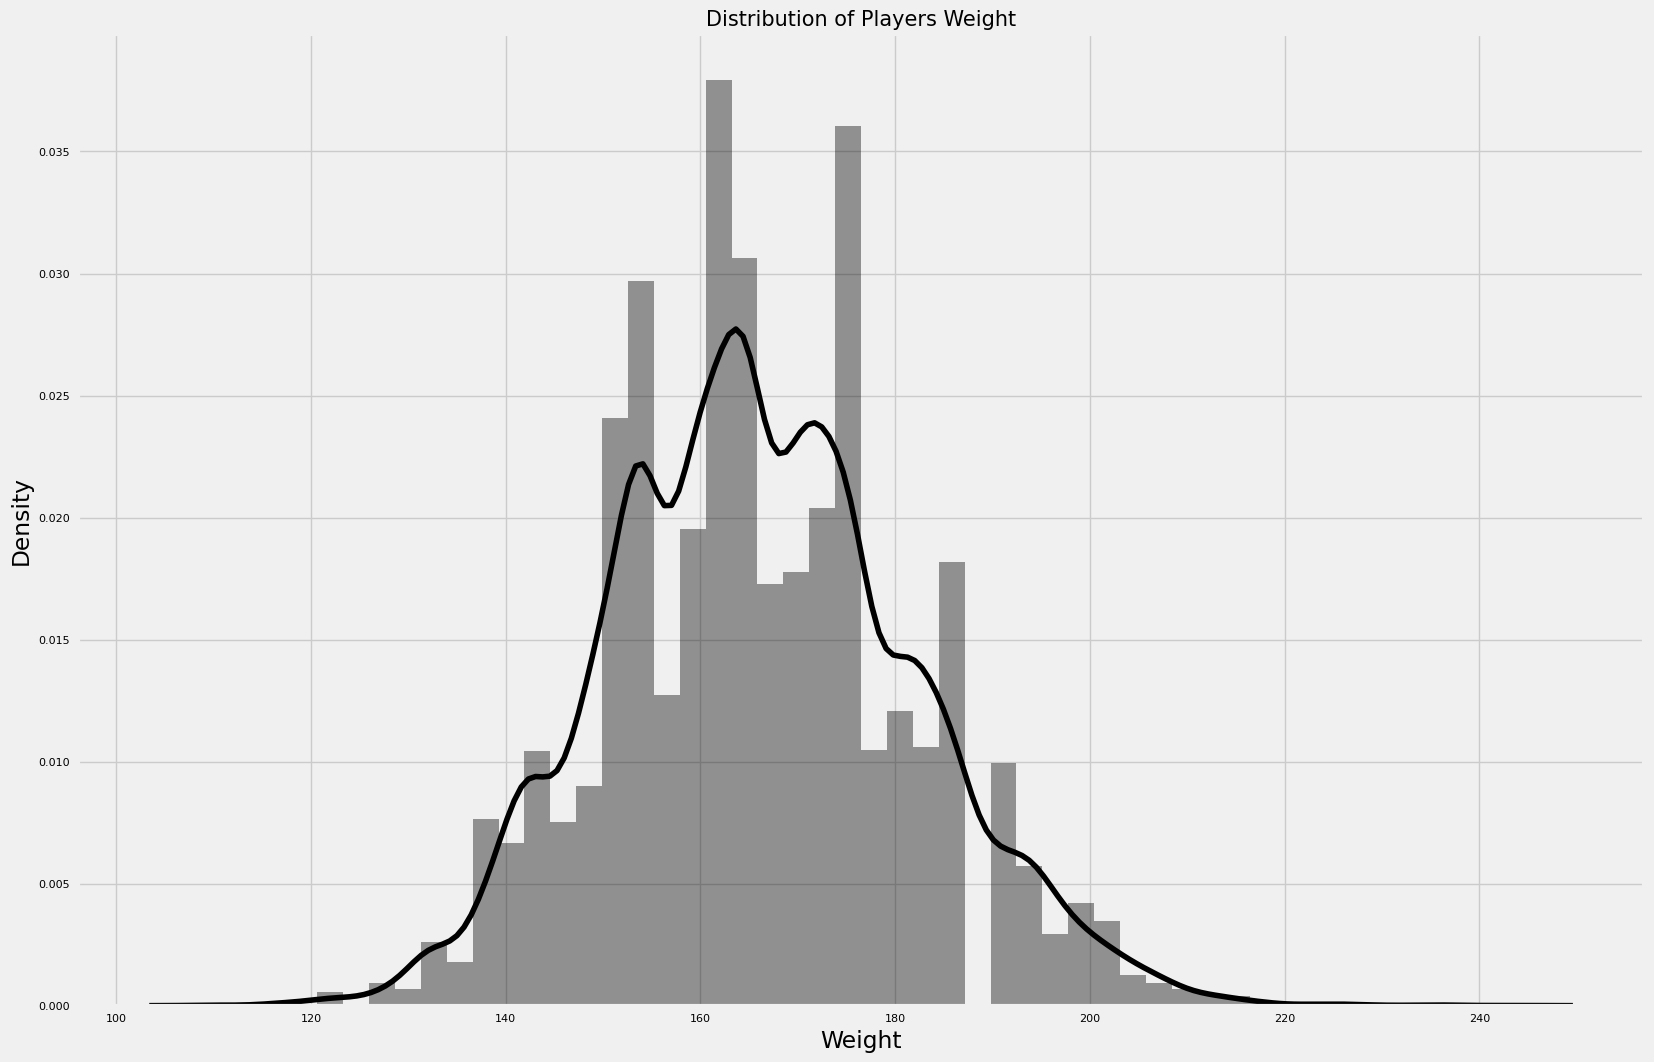

In [89]:
# plotting the distribution of weight of the players
sns.distplot(data['Weight'], color = 'black')
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

In [90]:
# defining a function for cleaning the wage column
def extract_value_from(column):
  out = column.replace('€', '')
  if 'M' in out:
    out = float(out.replace('M', ''))*1000000
  elif 'K' in column:
    out = float(out.replace('K', ''))*1000
  return float(out)
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

<ipython-input-91-c98f9c4ceeda>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Value'], color = 'violet')
<ipython-input-91-c98f9c4ceeda>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wage'], color = 'purple')


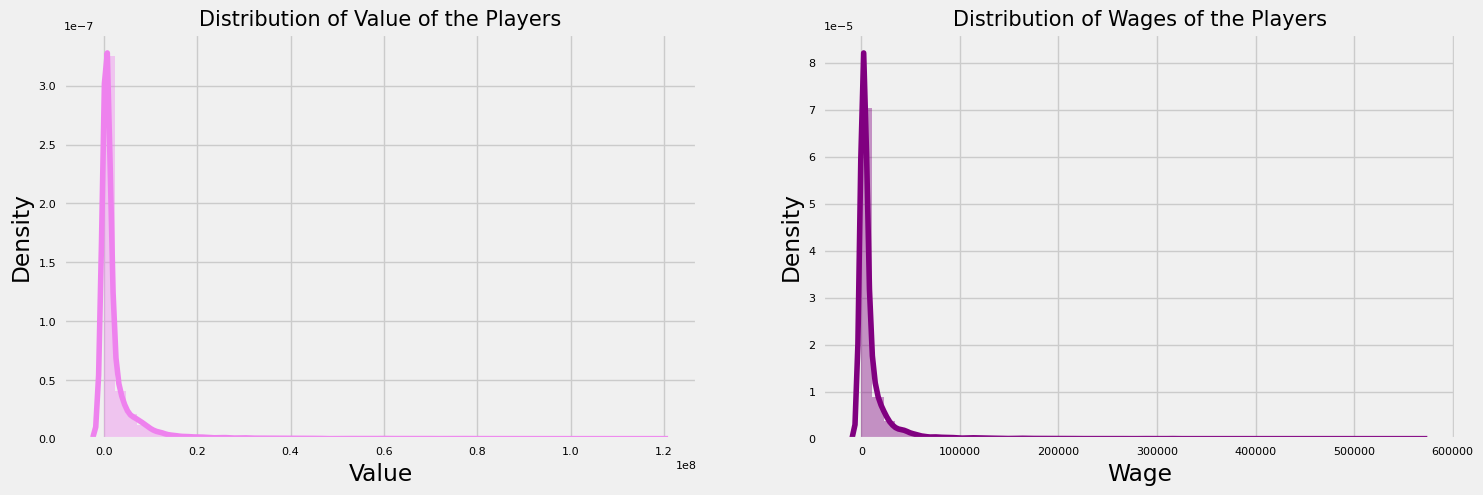

In [91]:
# visualizing the data
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of the Players', fontsize = 15)
plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

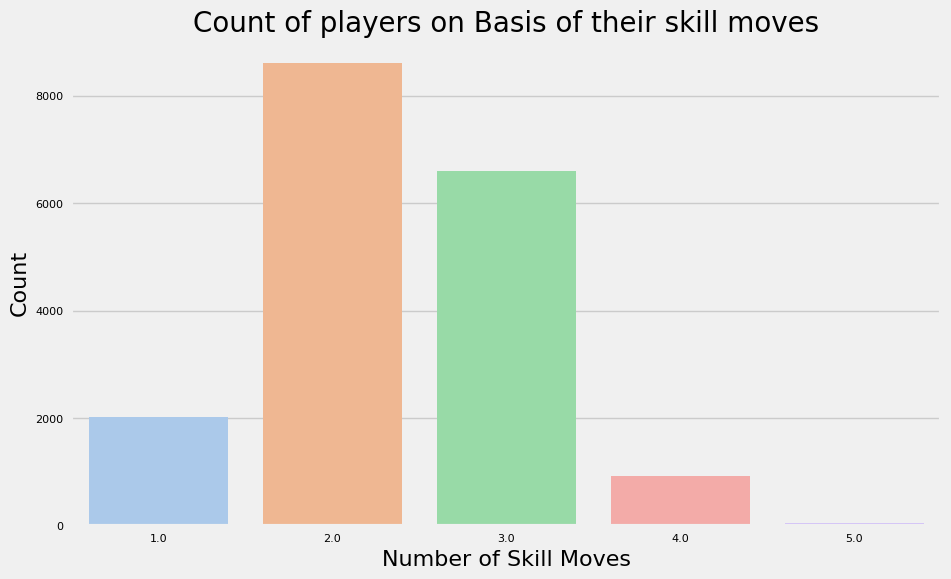

,Name,Age
25,K. Mbappé,19
124,M. Depay,24
164,K. Coman,22
233,Gelson Martins,23
243,F. Bernardeschi,24
557,David Neres,21
559,A. Harit,21
582,F. Cervi,24
1004,J. Sancho,18
1132,L. Acosta,24


In [92]:
# Skill Moves of Players
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize =
20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 25)][['Name','Age']]

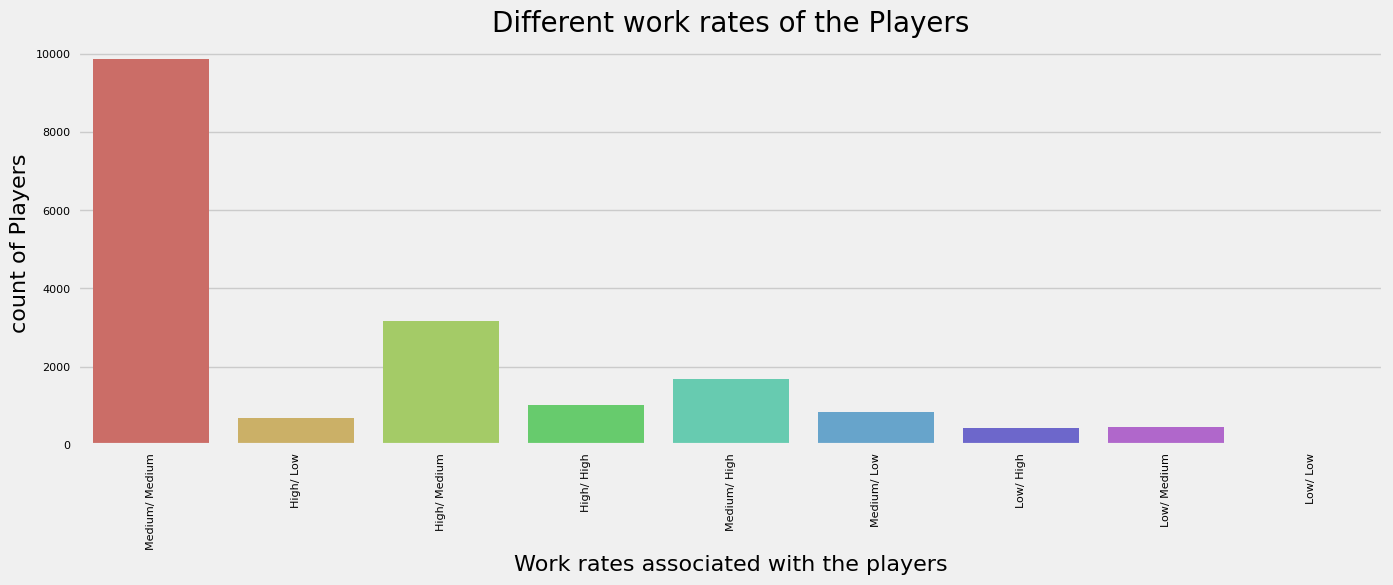

In [93]:
# To show Different Work rate of the players participating in the FIFA 2019
plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')
sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players',
fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-94-2175d0d0539f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')
<ipython-input-94-2175d0d0539f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
<ipython-input-94-2175d0d0539f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

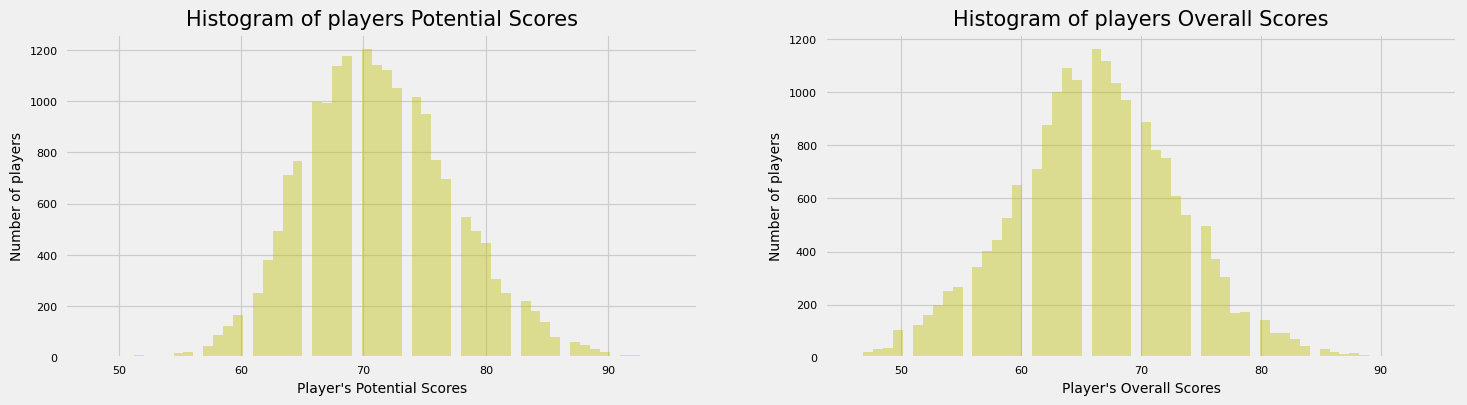

In [94]:
# To show Different potential scores of the players participating in the FIFA
2019
plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')
plt.subplot(1, 2, 1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)
plt.subplot(1, 2, 2)
y = data.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()


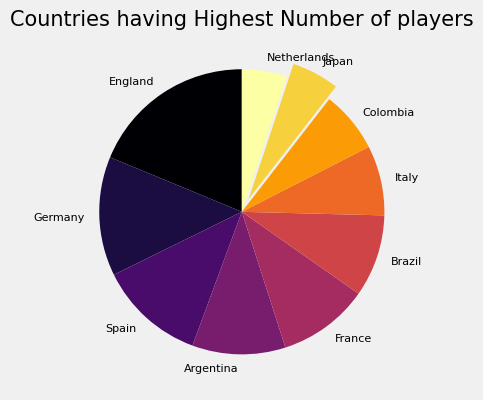

In [95]:
# picking up the countries with highest number of players to compare their overall scores
data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
 startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

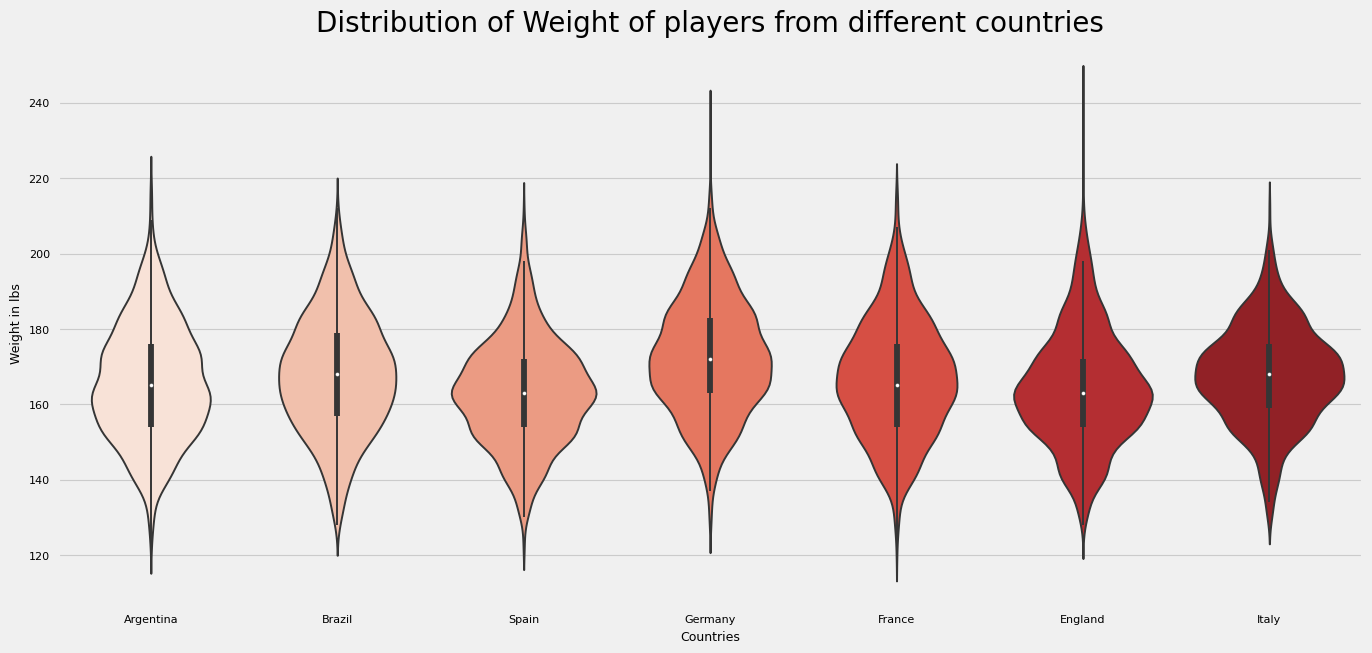

In [96]:
# Every Nations' Player and their Weights
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) &
data['Weight']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y =
data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries',
fontsize = 20)
plt.show()

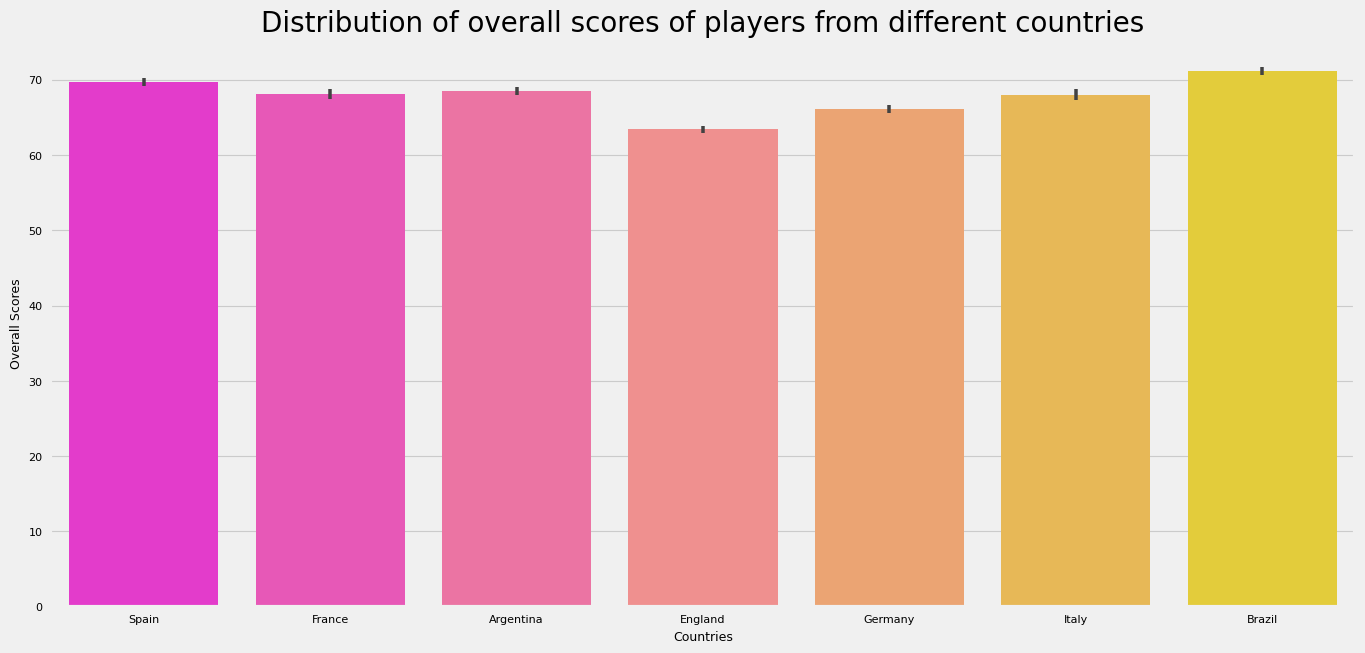

In [97]:
# Every Nations' Player and their overall scores
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) &
data['Overall']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'],
palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

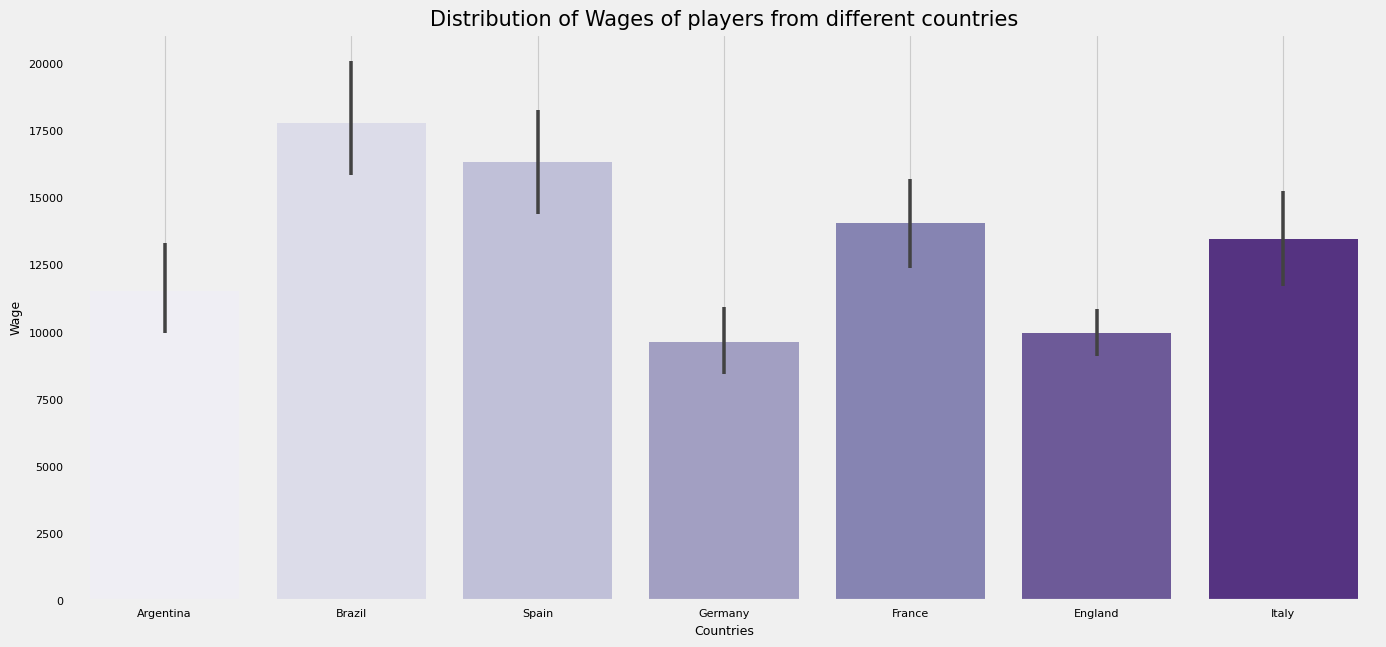

In [98]:
# Every Nations' Player and their wages
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) &
data['Wage']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'],
palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries',fontsize = 15)
plt.grid()
plt.show()


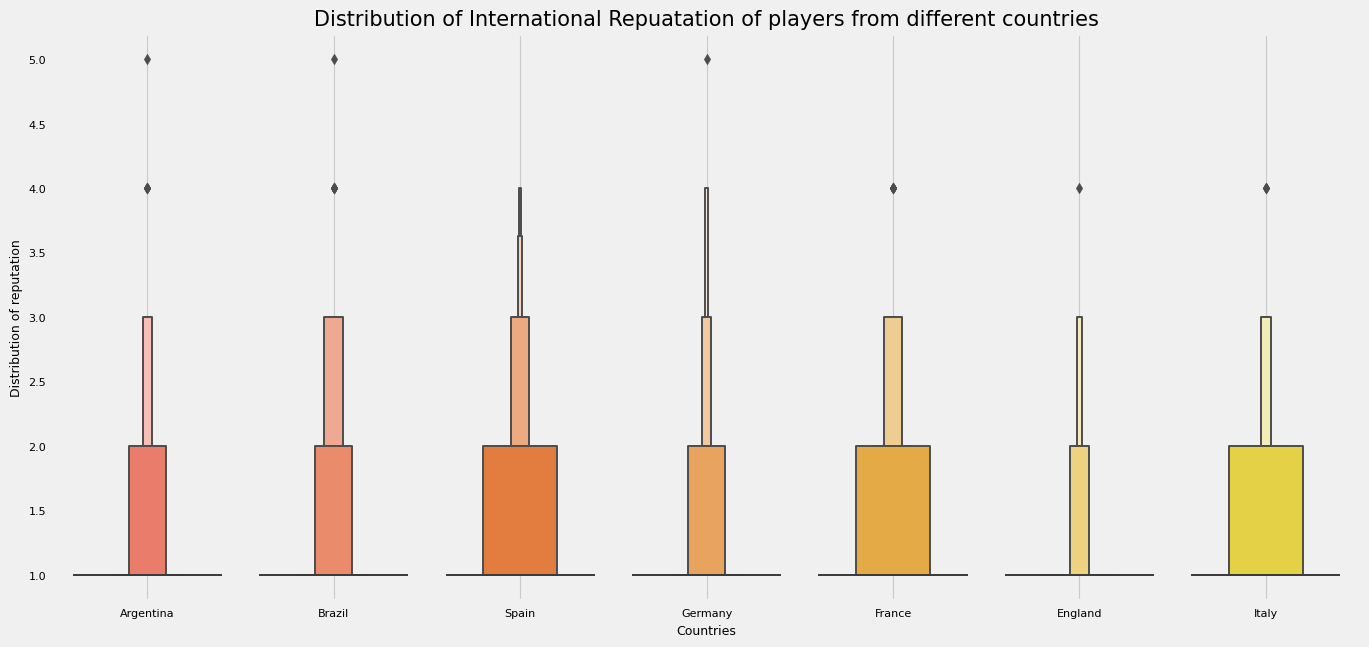

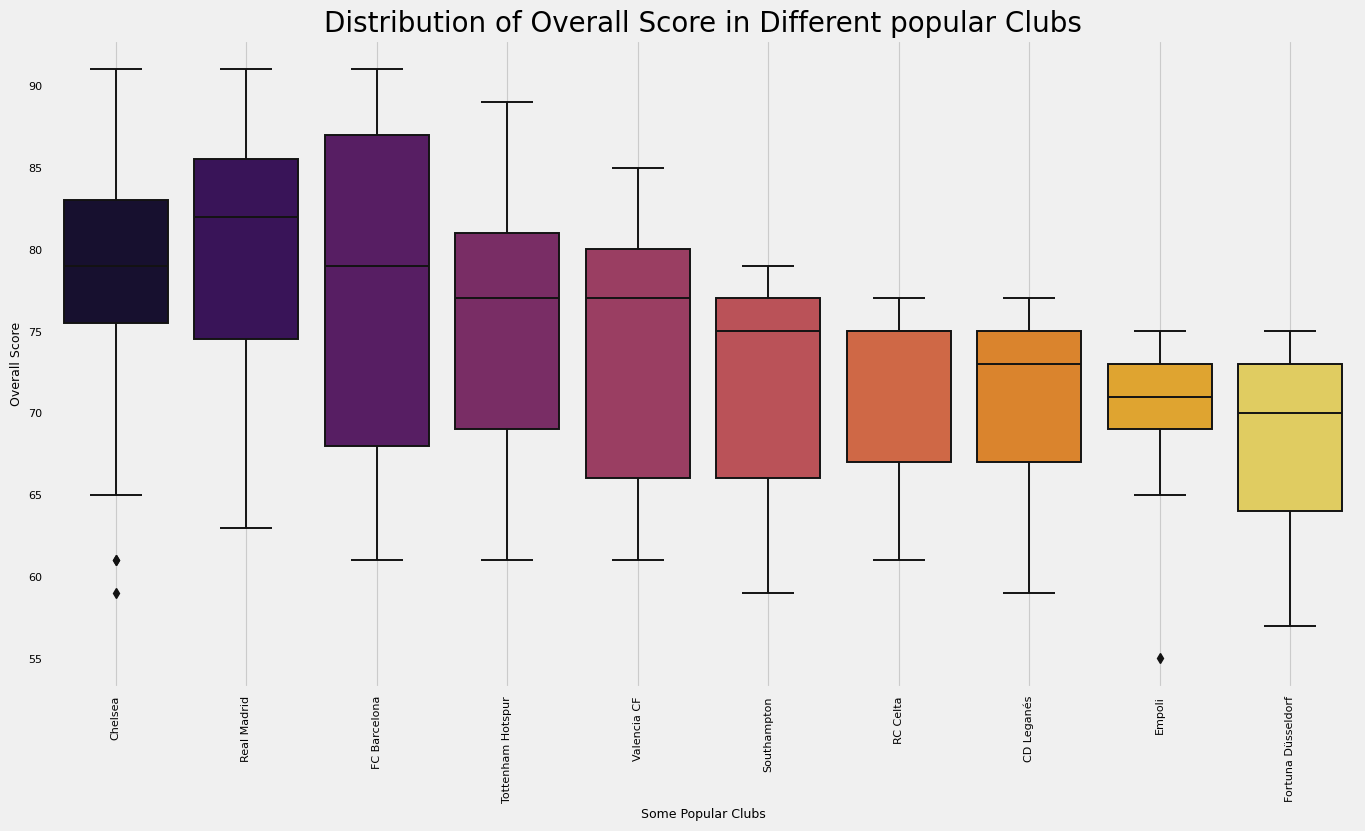

In [99]:
# Every Nations' Player and their International Reputation
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) &
data['International Reputation']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y =
data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.grid()
plt.show()
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
 'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette =
'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs',
fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()


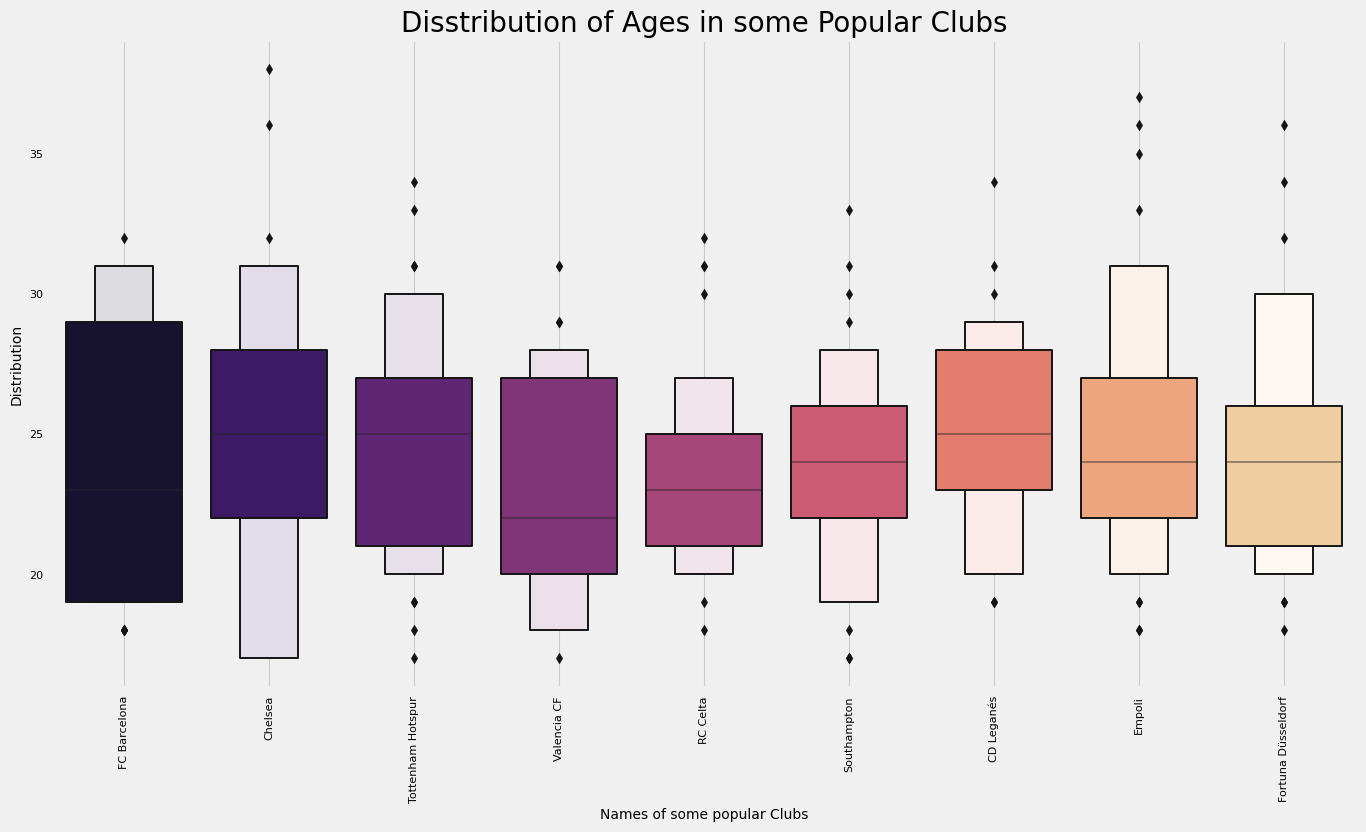

In [100]:
# Distribution of Ages in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
 'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'RealMadrid')
data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

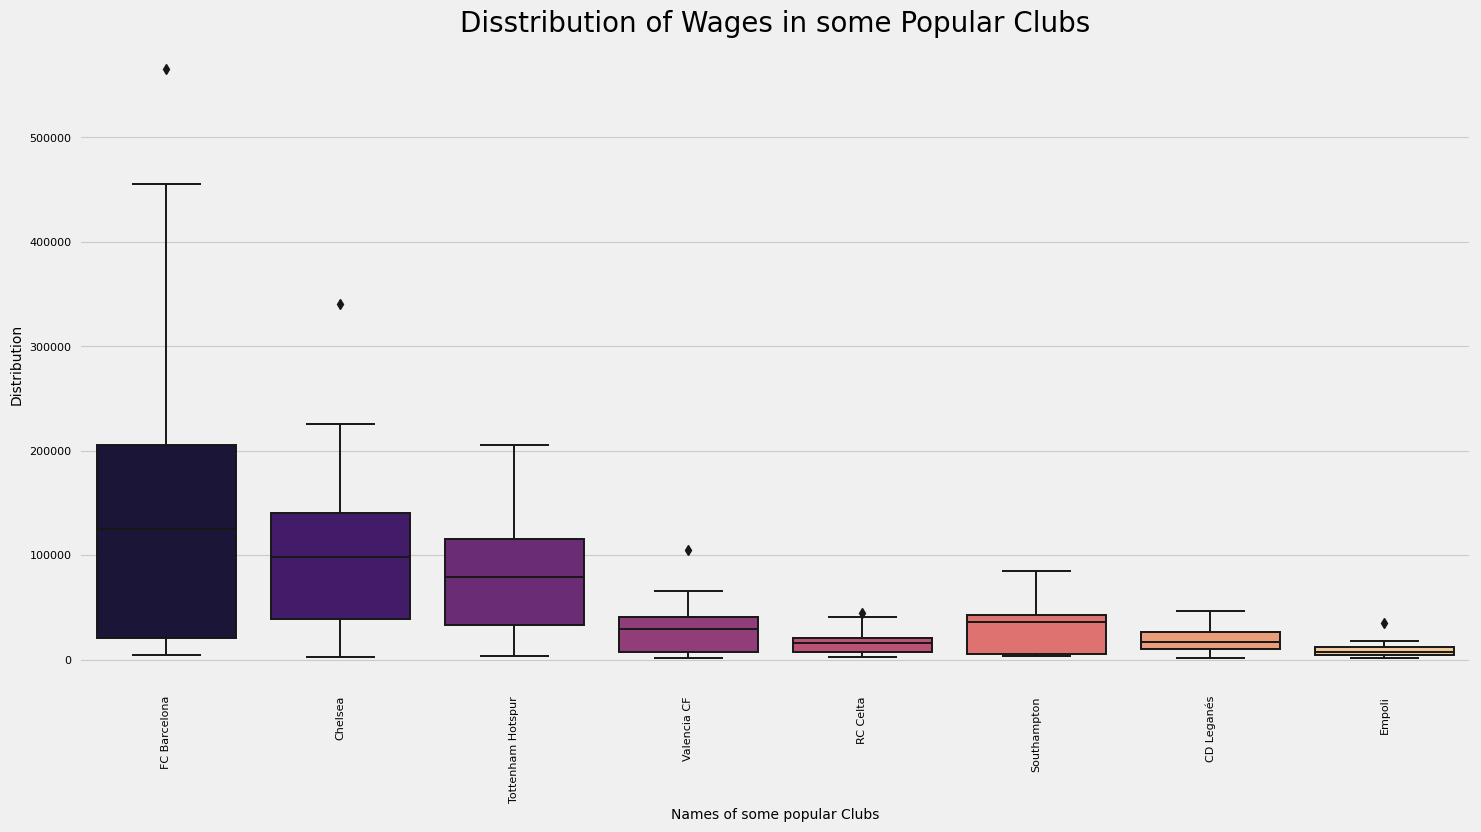

In [101]:
# Distribution of Wages in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'FortunaDüsseldorf', 'Manchestar City','Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'RealMadrid')
data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize =
20)
plt.xticks(rotation = 90)
plt.show()

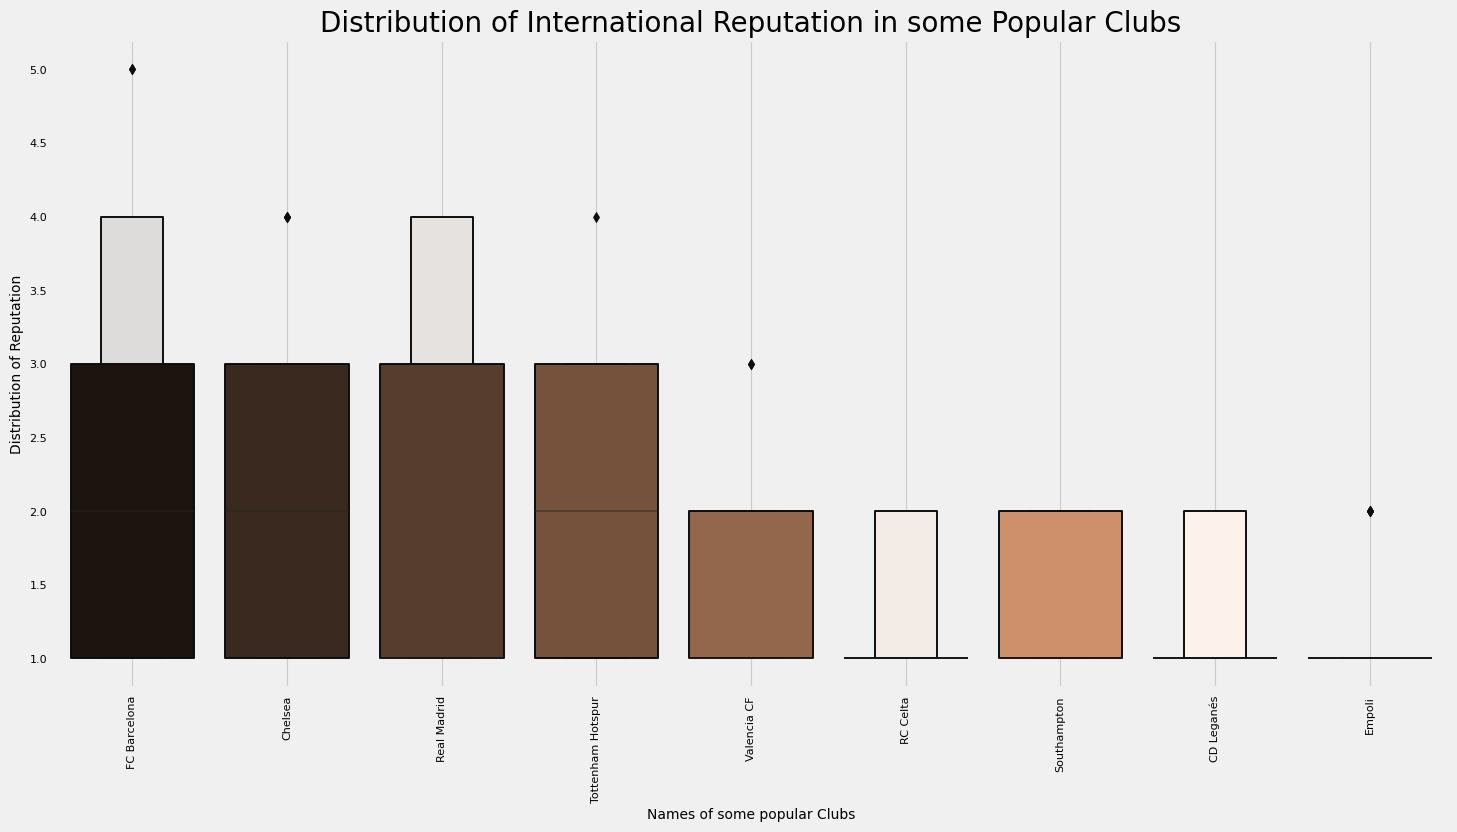

In [102]:
# Distribution of Wages in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'FortunaDüsseldorf', 'Manchestar City',
 'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation', data = data_club,palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()


In [103]:
# best players per each position with their age, club, and nationality based ontheir overall scores
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name',
'Age', 'Club', 'Nationality','Overall']].sort_values(by = 'Overall',
 ascending = False).style.background_gradient(cmap =
'pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [104]:
## Let's Analyze the Skills of Players
@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing','Mobility', 'Power', 'Rating','Shooting'], score = 75):
 return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall',skills]].sort_values(by = skills,
 ascending =False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [105]:
# lets make an interactive function for getting a report of the players countrywise
# lets make a function to see the list of top 15 players from each country
@interact
def country(country = list(data['Nationality'].value_counts().index)):
 return data[data['Nationality'] == country][['Name','Position','Overall','Potential']].sort_values(by = 'Overall',
 ascending = False).head(15).style.background_gradient(cmap= 'magma')


interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [106]:
# lets make an interactive function to get the list of top 15 players from each ofthe club
# lets define a function
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
 return data[data['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
 'Value','Contract Valid Until']].sort_values(by = 'Overall', ascending =False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…

In [107]:
# finding 5 youngest Players from the dataset
youngest = data[data['Age'] == 16][['Name', 'Age', 'Club', 'Nationality',
'Overall']]
youngest.sort_values(by = 'Overall', ascending =
False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [108]:
# finding 15 eldest players from the dataset
data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
 'Nationality','Overall']].head(15).style.background_gradient(cmap = 'Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [109]:
# The longest membership in the club
now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year -
int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by =
'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap = 'Reds')
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = 'Years_of_member',
 club = ['FC Barcelona', 'Real Madrid', 'Chelsea'], x = 4):
 return data[(data[column] > x) & (data['Club'] == club)][['Name', 'Club',
 'Years_of_member']].sort_values(by =
'Years_of_member',
 ascending =
False).style.background_gradient(cmap = 'magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [110]:
# defining the features of players
player_features = ('Acceleration', 'Aggression', 'Agility',
 'Balance', 'BallControl', 'Composure',
 'Crossing', 'Dribbling', 'FKAccuracy',
 'Finishing', 'GKDiving', 'GKHandling',
 'GKKicking', 'GKPositioning', 'GKReflexes',
 'HeadingAccuracy', 'Interceptions', 'Jumping',
 'LongPassing', 'LongShots', 'Marking', 'Penalties')

In [111]:
# Top four features for every position in football
for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
 print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

<ipython-input-111-0d6b95ee2e8e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():


In [112]:
# Top 10 left footed footballers
data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
 'Nationality', 'Overall']].sort_values(by = 'Overall',
 ascending = False).head(10).style.background_gradient(cmap = 'bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [113]:
# Top 10 Right footed footballers
data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
 'Nationality', 'Overall']].sort_values(by = 'Overall',
 ascending = False).head(10).style.background_gradient(cmap= 'copper')


,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


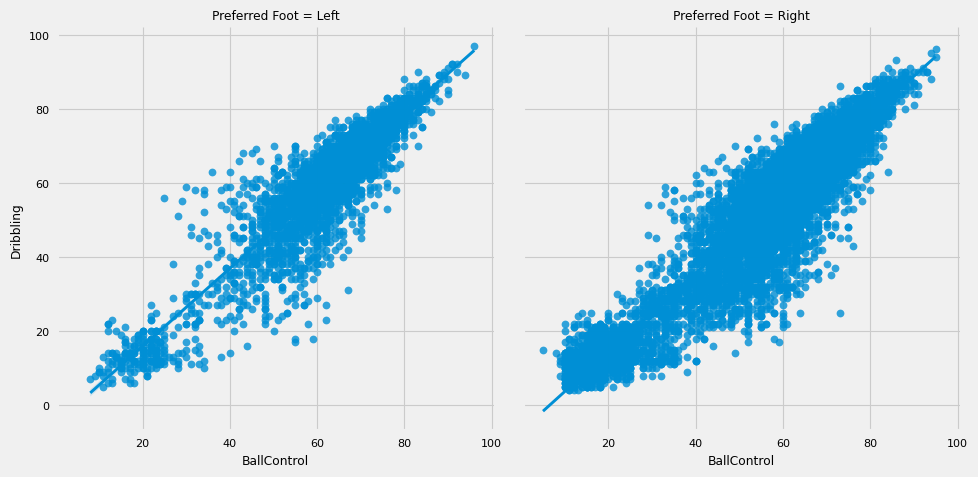

In [114]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

In [115]:
pdf = pd.read_csv('/content/drive/MyDrive/stat ml/fifa_eda_stats.csv')
pdf.head(10)
pdf.describe()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree

In [116]:
from IPython.display import Image
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
pdf=pdf.drop('Club',axis=1)

In [117]:
pdf.isnull().sum()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp
from sklearn.cluster import DBSCAN
label_encoder=LabelEncoder()

<ipython-input-118-4fc3375e3757>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[skills[i]], color=colors[i])
<ipython-input-118-4fc3375e3757>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[skills[i]], color=colors[i])
<ipython-input-118-4fc3375e3757>:10: UserWarning: 

`distplot`

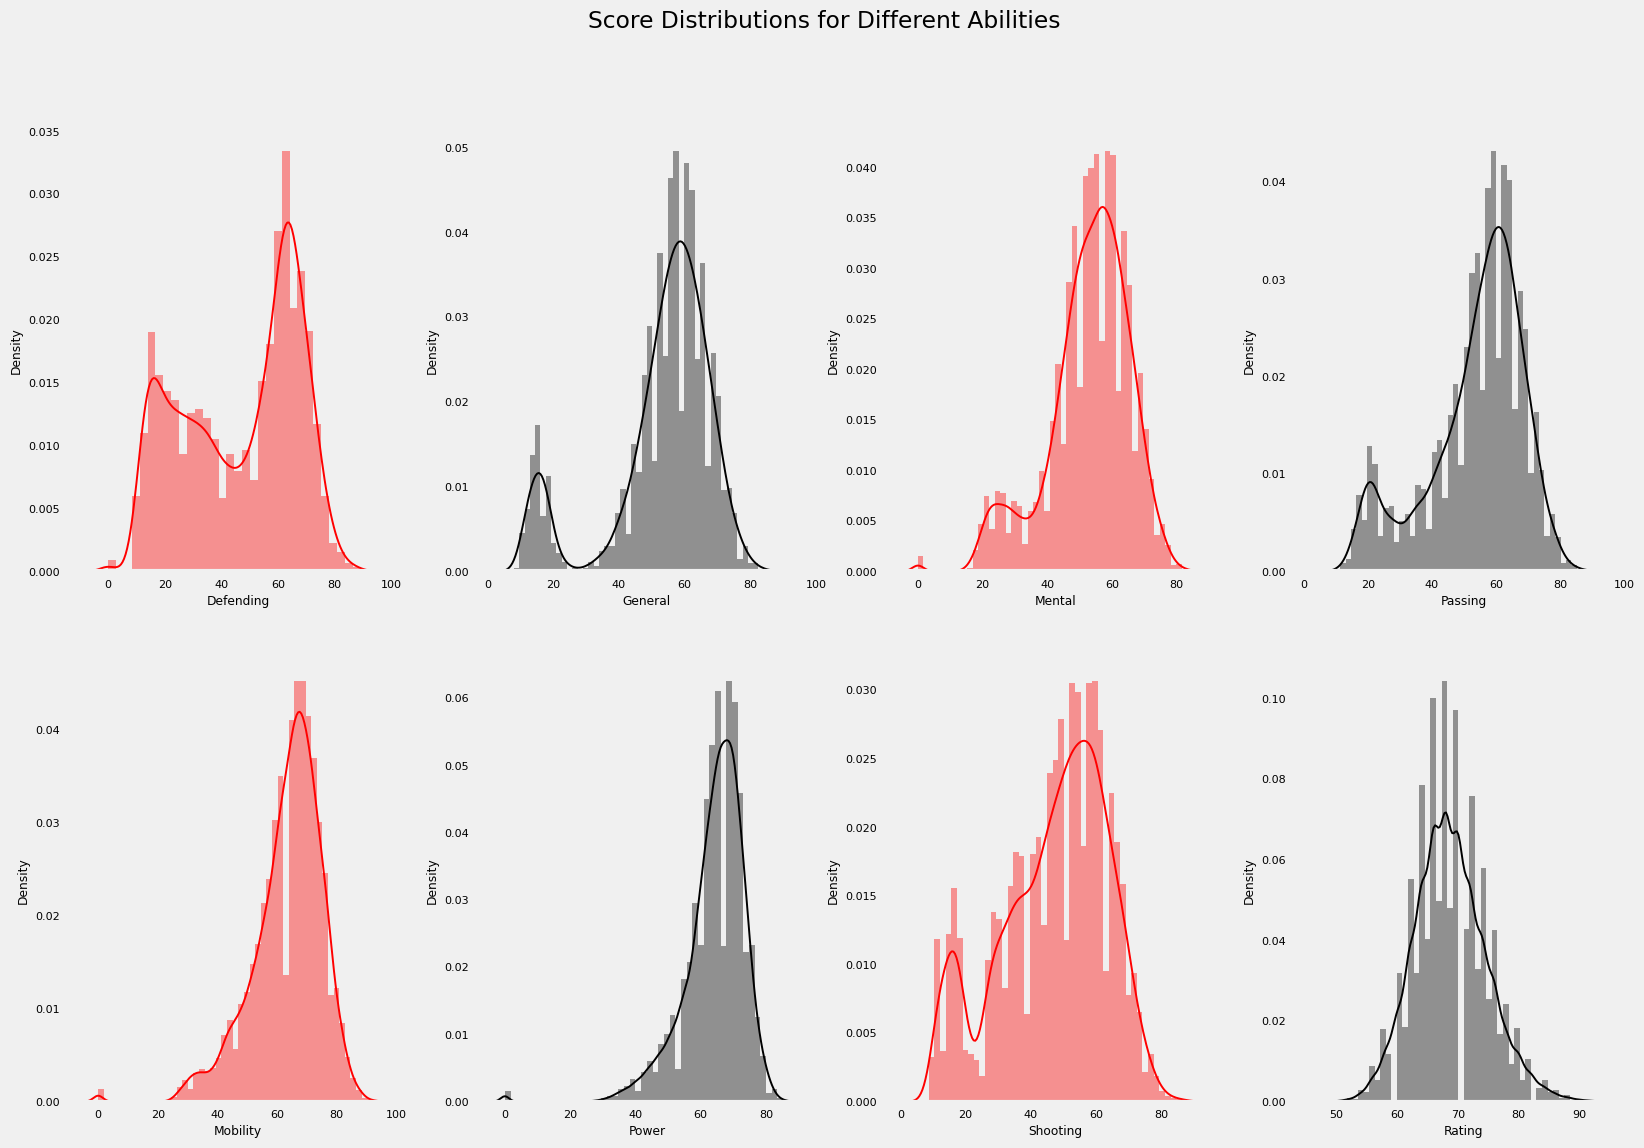

In [118]:
# Set figure size for all plots
plt.rcParams['figure.figsize'] = (18, 12)

# Distribution of Scores of Different Skills
skills = ['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Shooting', 'Rating']
colors = ['red', 'black', 'red', 'black', 'red', 'black', 'red', 'black']

for i in range(8):
  plt.subplot(2, 4, i + 1)
  sns.distplot(data[skills[i]], color=colors[i])
  plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()




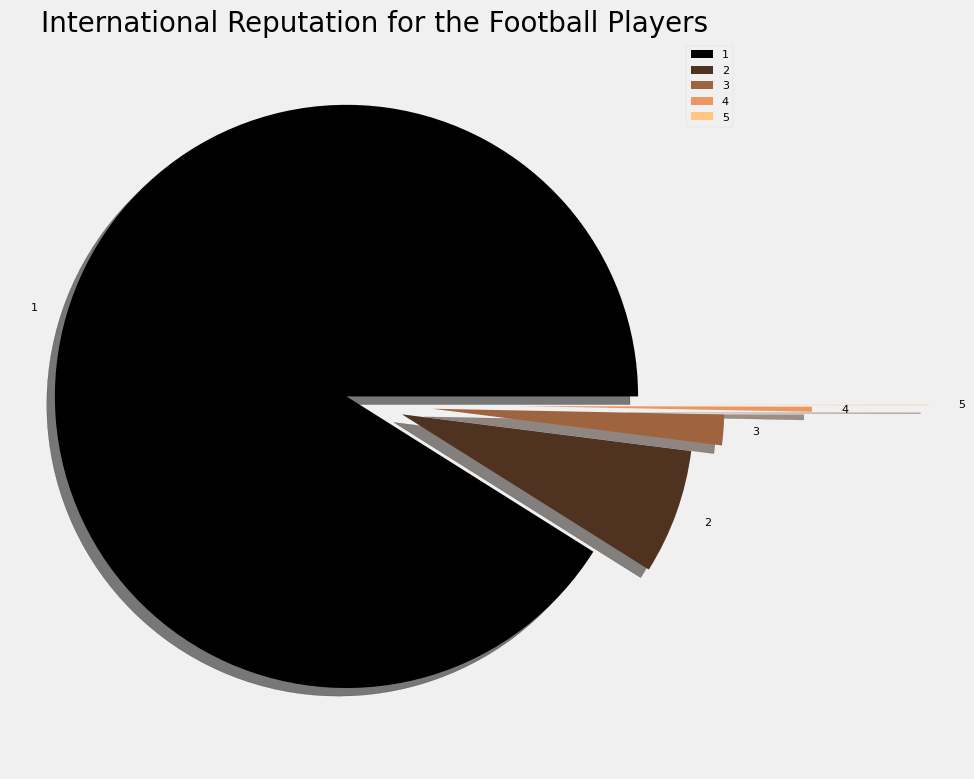

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


In [119]:
# Pie chart for International Reputation
labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True)
plt.title('International Reputation for the Football Players', fontsize=20)
plt.legend()
plt.show()

# Players with the highest International Reputation
top_players = data[data['International Reputation'] == 5][['Name', 'Nationality', 'Overall']].sort_values(by='Overall', ascending=False)
top_players.style.background_gradient(cmap='magma')

<ipython-input-120-e2793bc03352>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Value'],color ='violet')
<ipython-input-120-e2793bc03352>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wage'], color = 'purple')


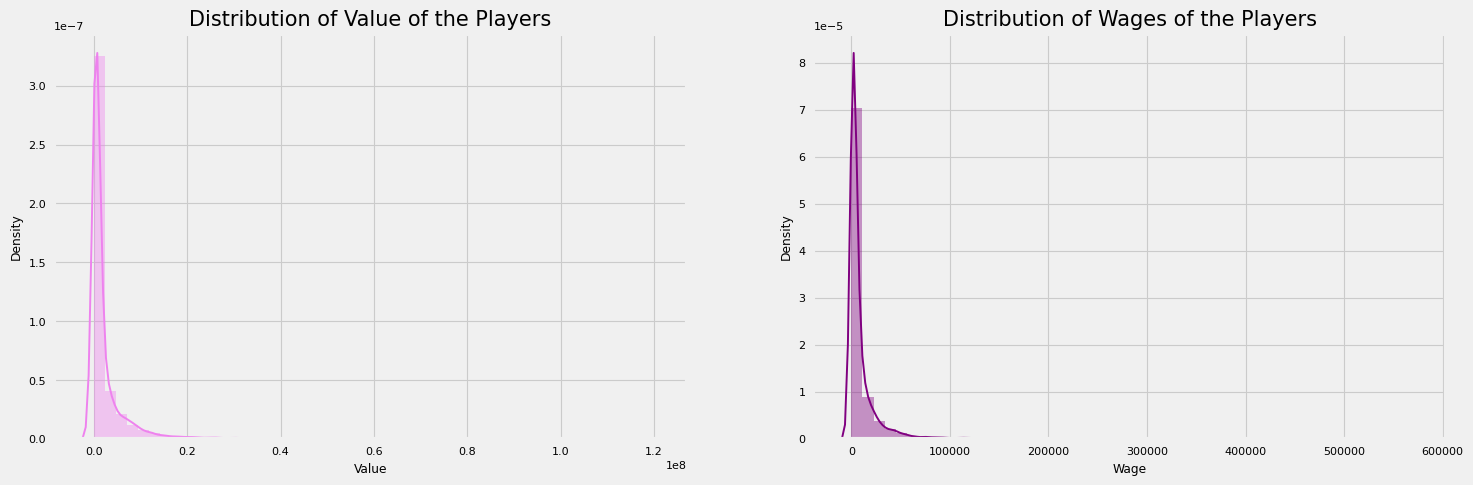

In [120]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'],color ='violet')
plt.title('Distribution of Value of the Players', fontsize = 15)
plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset (assuming you've stored the dataset in a CSV file named 'fifa19.csv')

# Select the features (columns) that you want to use for classification
# I'm selecting a few features here for illustration; feel free to customize this.
selected_features = [
    'Age', 'Overall', 'Potential', 'International Reputation',
    'BallControl', 'Dribbling', 'Reactions'
]
X = data[selected_features]

# Encode the target variable 'Overall' (assuming you want to predict player ratings)
y = data['Overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear')  # You can change the kernel type if needed
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.82%


In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Select the features (columns) that you want to use for classification
# I'm selecting a few features here for illustration; feel free to customize this.
selected_features = [
    'Age', 'Overall', 'Potential', 'International Reputation',
    'BallControl', 'Dribbling', 'Reactions'
]
X = data[selected_features]

# Encode the target variable 'Overall' (assuming you want to predict player ratings)
# You can change this to another target variable if needed.
y = data['Overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.97%


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Select the features (columns) that you want to use for classification
# I'm selecting a few features here for illustration; feel free to customize this.
selected_features = [
    'Age', 'Overall', 'Potential', 'International Reputation',
    'BallControl', 'Dribbling', 'Reactions'
]
X = data[selected_features]

# Encode the target variable 'Overall' (assuming you want to predict player ratings)
# You can change this to another target variable if needed.
y = data['Overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


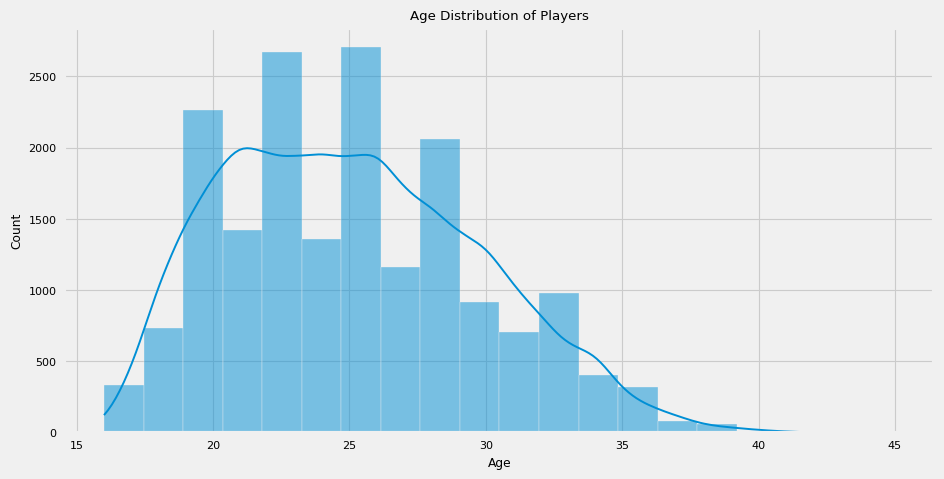

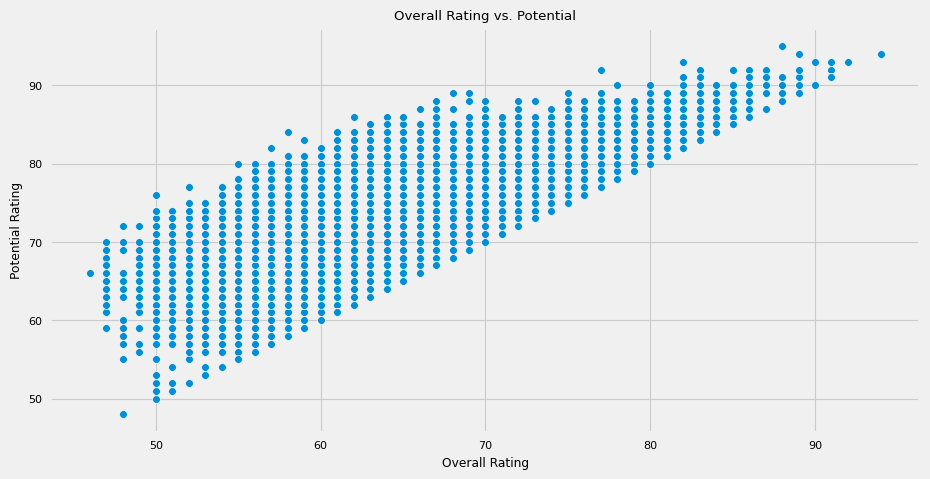

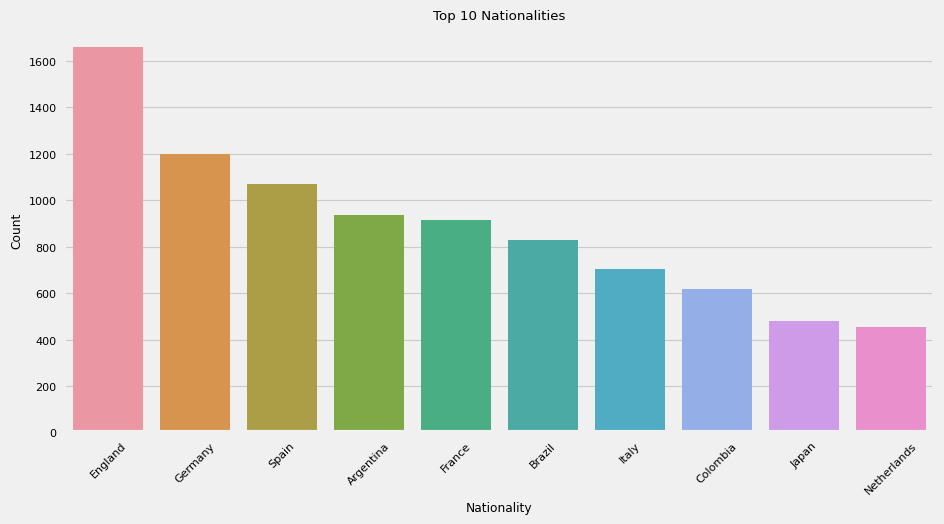

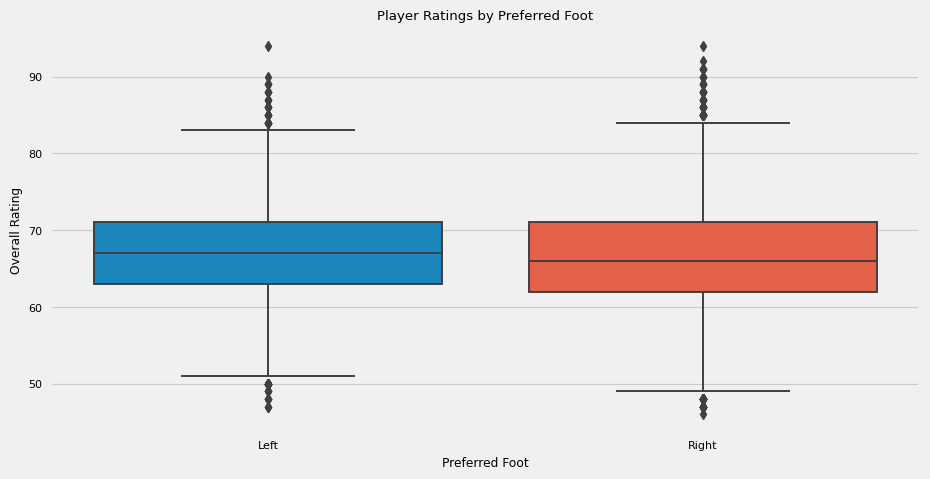

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you've stored the dataset in a CSV file named 'fifa19.csv')


# Create a histogram of player ages
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Create a scatter plot of player overall ratings vs. potential
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Overall', y='Potential', data=data)
plt.title('Overall Rating vs. Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.show()

# Create a bar plot for the top 10 nationalities in the dataset
top_nationalities = data['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a box plot for player ratings by preferred foot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Preferred Foot', y='Overall', data=data)
plt.title('Player Ratings by Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Overall Rating')
plt.show()


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Preprocessing
# Example: Predicting player overall rating based on age and potential

# Select features and target variable
features = ['Age', 'Potential']
target = 'Overall'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error: 1.04
Mean Squared Error: 2.43
R-squared (R2): 0.95


In [126]:
df =pd.read_csv('/content/drive/MyDrive/stat ml/fifa_eda_stats.csv')

In [127]:
df.drop('Contract Valid Until', axis=1, inplace=True)

In [128]:
df['Value'] = df['Value'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('€', '')
df['Release Clause'] = df['Release Clause'].str.replace('€', '')

# Convert values to numeric
df['Value'] = df['Value'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
df['Wage'] = df['Wage'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
df['Release Clause'] = df['Release Clause'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

In [129]:
# Drop players with no value
df = df[df['Value'] != 0]

# Height to inches
height_split = df['Height'].str.split("'", expand=True)
feet = height_split[0].astype(float)
inches = height_split[1].astype(float)
df['Height'] = feet * 12 + inches
df.dropna(subset=['Height'], inplace=True)  # Drop rows with missing height values

# Fix weight to remove lbs
df['Weight'] = df['Weight'].str.replace('lbs', '').astype(int)

In [130]:
df = df[df['Age'] < 30]

# Remove duplicate entries based on ID
df.drop_duplicates(subset='ID', keep='first', inplace=True)

<ipython-input-130-8f91f3475298>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='ID', keep='first', inplace=True)


In [131]:
goalkeepers = df[df['Position'].isin(['GK'])]
center_backs = df[df['Position'].isin(['CB', 'LCB', 'RCB'])]
full_backs = df[df['Position'].isin(['LB', 'RB', 'LWB', 'RWB'])]
central_midfielders = df[df['Position'].isin(['CM', 'CDM'])]
wing_midfielders = df[df['Position'].isin(['LM', 'RM', 'LCM', 'RCM', 'LDM', 'RDM'])]
attacking_midfielders = df[df['Position'] == 'CAM']
strikers = df[df['Position'].isin(['ST', 'LS', 'RS'])]
wingers = df[df['Position'].isin(['LW', 'RW', 'LF', 'RF'])]

In [132]:
goalkeepers_ranked = goalkeepers.sort_values(by=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Strength', 'Jumping', 'Height', 'Reactions', 'ShortPassing', 'LongPassing'], ascending=False)
center_backs_ranked = center_backs.sort_values(by=['HeadingAccuracy', 'Interceptions', 'Marking', 'StandingTackle', 'SlidingTackle', 'Strength', 'Jumping'], ascending=False)
full_backs_ranked = full_backs.sort_values(by=['Crossing', 'Dribbling', 'Acceleration', 'SprintSpeed', 'Stamina', 'Interceptions', 'Marking', 'StandingTackle'], ascending=False)
central_midfielders_ranked = central_midfielders.sort_values(by=['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'Stamina', 'Interceptions', 'Marking'], ascending=False)
wing_midfielders_ranked = wing_midfielders.sort_values(by=['Dribbling', 'Crossing', 'Acceleration', 'SprintSpeed', 'Stamina', 'BallControl'], ascending=False)
attacking_midfielders_ranked = attacking_midfielders.sort_values(by=['Vision', 'LongPassing', 'Dribbling', 'ShotPower', 'LongShots', 'Positioning', 'BallControl'], ascending=False)
strikers_ranked = strikers.sort_values(by=['Finishing', 'HeadingAccuracy', 'Positioning', 'Acceleration', 'SprintSpeed', 'ShotPower', 'LongShots'], ascending=False)
wingers_ranked = wingers.sort_values(by=['Dribbling', 'Crossing', 'Acceleration', 'SprintSpeed', 'Agility', 'BallControl', 'Finishing'], ascending=False)

In [133]:
# Select players
selected_players = []
total_value = 0

# Define desired number of players for each position
desired_positions = {
    'GK': 1,
    'CB': 2,
    'LB': 1,
    'RB': 1,
    'CM': 2,
    'CDM': 1,
    'LM': 1,
    'RM': 1,
    'CAM': 1,
    'ST': 1,
    'LW': 1,
    'RW': 1
}

In [134]:
# Select top players based on overall rating and position
for position, count in desired_positions.items():
    if position == 'GK':
        position_players = goalkeepers_ranked
    elif position == 'CB':
        position_players = center_backs_ranked
    elif position == 'LB' or position == 'RB':
        position_players = full_backs_ranked
    elif position == 'CM' or position == 'CDM':
        position_players = central_midfielders_ranked
    elif position == 'LM' or position == 'RM':
        position_players = wing_midfielders_ranked
    elif position == 'CAM':
        position_players = attacking_midfielders_ranked
    elif position == 'ST':
        position_players = strikers_ranked
    elif position == 'LW' or position == 'RW':
        position_players = wingers_ranked
    else:
        position_players = pd.DataFrame()

    for _, player in position_players.iterrows():
        if total_value + player['Value'] <= 600000000.0 and count > 0 and player['ID'] not in selected_players:
            selected_players.append(player['ID'])
            total_value += player['Value']
            count -= 1

        if len(selected_players) >= 16 or count == 0:
            break

In [135]:
selected_players_df = df[df['ID'].isin(selected_players)]

# Calculate total budget
total_budget = selected_players_df['Value'].sum()
print("Total Budget: €", total_budget)

# Reset index and display selected players with the specified columns
selected_players_df.reset_index(drop=True, inplace=True)
columns_to_print = ['ID', 'Name', 'Age', 'Club', 'Value', 'Overall']
selected_players_df.index += 1  # Start index from 1
print(selected_players_df[columns_to_print])

Total Budget: € 598100000.0
        ID           Name  Age                     Club       Value  Overall
1   193080         De Gea   27        Manchester United  72000000.0       91
2   183277      E. Hazard   27                  Chelsea  93000000.0       91
3   202126        H. Kane   24        Tottenham Hotspur  83500000.0       89
4   190460     C. Eriksen   26        Tottenham Hotspur  73500000.0       88
5   190483  Douglas Costa   27                 Juventus  46500000.0       86
6   189509         Thiago   27        FC Bayern München  45500000.0       86
7   180206      M. Pjanić   28                 Juventus  44000000.0       86
8   184267     Y. Brahimi   28                 FC Porto  39000000.0       85
9   205498       Jorginho   26                  Chelsea  38000000.0       84
10  201956        S. Sané   27            FC Schalke 04  18500000.0       82
11  186345    K. Trippier   27        Tottenham Hotspur  18500000.0       82
12  212187         P. Max   24              FC A

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Select features and target variable
features = ['Age', 'Overall', 'Potential','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve',"FKAccuracy",'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance',
            'ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
            'Interceptions','Positioning','Vision','Penalties','Composure',
            'Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling',
            'GKKicking',"GKPositioning",'GKReflexes']
# Your selected features
target = 'Position'  # The variable you want to predict

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (Random Forest Classifier as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (ACC): {accuracy:.2f}")

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalances
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision (P): {precision:.2f}")
print(f"Recall (R): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy (ACC): 0.52
Precision (P): 0.44
Recall (R): 0.52
F1 Score: 0.47
Classification Report:
              precision    recall  f1-score   support

         CAM       0.39      0.41      0.40       153
          CB       0.56      0.86      0.68       289
         CDM       0.42      0.54      0.47       142
          CF       0.00      0.00      0.00        12
          CM       0.47      0.79      0.59       246
          GK       1.00      1.00      1.00       281
         LAM       0.00      0.00      0.00         2
          LB       0.46      0.47      0.46       237
         LCB       0.20      0.03      0.05       103
         LCM       0.00      0.00      0.00        58
         LDM       0.00      0.00      0.00        31
          LF       0.00      0.00      0.00         2
          LM       0.25      0.25      0.25       199
          LS       0.00      0.00      0.00        30
          LW       0.33      0.03      0.06        63
         LWB       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13